In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

In [3]:
np.random.seed(450)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
batch_size, nb_classes, nb_epochs, img_channels, img_rows, img_cols = 32, 10, 25, 3, 32, 32
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation="softmax"))
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epochs, validation_split=0.1, shuffle=True, verbose=2)
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Test data accuracy: %.2f%%" % (scores[1] * 100))
model.save("cnn_model.h5")

170498071/170498071 [==============================] - 17s 0us/step


Epoch 1/25


1407/1407 - 111s - loss: 1.7485 - accuracy: 0.3550 - val_loss: 1.5289 - val_accuracy: 0.4420 - 111s/epoch - 79ms/step
Epoch 2/25
1407/1407 - 95s - loss: 1.3305 - accuracy: 0.5186 - val_loss: 1.0829 - val_accuracy: 0.6208 - 95s/epoch - 68ms/step
Epoch 3/25
1407/1407 - 90s - loss: 1.1421 - accuracy: 0.5922 - val_loss: 0.9343 - val_accuracy: 0.6720 - 90s/epoch - 64ms/step
Epoch 4/25
1407/1407 - 89s - loss: 1.0232 - accuracy: 0.6355 - val_loss: 0.8837 - val_accuracy: 0.6892 - 89s/epoch - 64ms/step
Epoch 5/25
1407/1407 - 87s - loss: 0.9399 - accuracy: 0.6700 - val_loss: 0.8762 - val_accuracy: 0.6926 - 87s/epoch - 62ms/step
Epoch 6/25
1407/1407 - 85s - loss: 0.8809 - accuracy: 0.6909 - val_loss: 0.8327 - val_accuracy: 0.7150 - 85s/epoch - 61ms/step
Epoch 7/25
1407/1407 - 90s - loss: 0.8382 - accuracy: 0.7059 - val_loss: 0.7406 - val_accuracy: 0.7442 - 90s/epoch - 64ms/step
Epoch 8/25
1407/1407 - 91s - loss: 0.

c:\Users\bohdan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
img = image.load_img("airplane.jpg", target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
model.predict(img_array)

1/1 [==============================] - 0s 35ms/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
img = image.load_img("automobile.jpg", target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
model.predict(img_array)

1/1 [==============================] - 0s 41ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
img = image.load_img("bird.jpg", target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
model.predict(img_array)

1/1 [==============================] - 0s 41ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
img = image.load_img("cat.jpg", target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
model.predict(img_array)

1/1 [==============================] - 0s 49ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [29]:
img = image.load_img("deer.jpg", target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
model.predict(img_array)

1/1 [==============================] - 0s 40ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
img = image.load_img("dog.jpg", target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
model.predict(img_array)

1/1 [==============================] - 0s 51ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [34]:
img = image.load_img("frog.jpg", target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
model.predict(img_array)

1/1 [==============================] - 0s 43ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
img = image.load_img("horse.jpg", target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
model.predict(img_array)

1/1 [==============================] - 0s 46ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [38]:
img = image.load_img("ship.jpg", target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
model.predict(img_array)

1/1 [==============================] - 0s 38ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

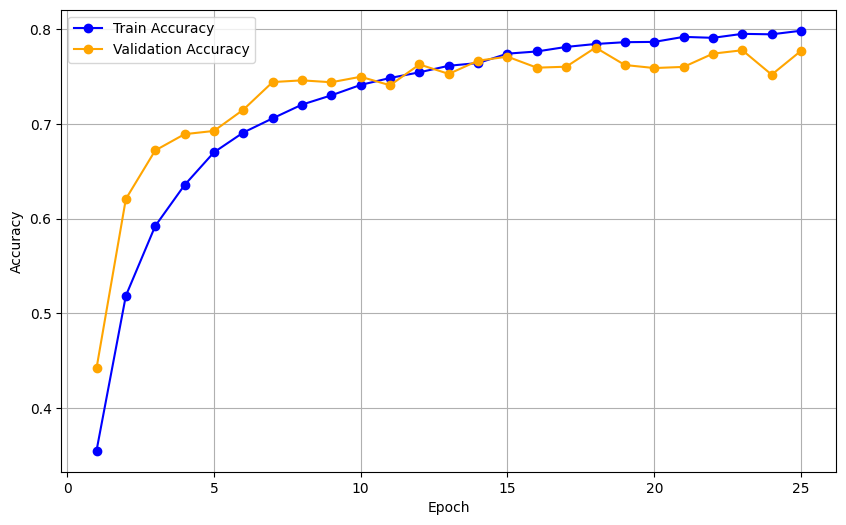

In [42]:
train_accuracy = [
    0.3550, 0.5186, 0.5922, 0.6355, 0.6700, 0.6909, 0.7059, 0.7204, 0.7302, 0.7412, 0.7485, 0.7545, 0.7614, 0.7643, 0.7742,
    0.7765, 0.7813, 0.7844, 0.7863, 0.7866, 0.7919, 0.7909, 0.7951, 0.7946, 0.7984 
]
validation_accuracy = [
    0.4420, 0.6208, 0.6720, 0.6892, 0.6926, 0.7150, 0.7442, 0.7460, 0.7440, 0.7498, 0.7408, 0.7628, 0.7528,
    0.7668, 0.7710, 0.7594, 0.7604, 0.7806, 0.7622, 0.7590, 0.7602, 0.7742, 0.7778, 0.7520, 0.7772
]
epochs = list(range(1, 26))
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label="Train Accuracy", marker="o", color="blue")
plt.plot(epochs, validation_accuracy, label="Validation Accuracy", marker="o", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [43]:
def metrics(y_true, y_pred):
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true, y_pred, average="weighted"))
    print("Recall: ", recall_score(y_true, y_pred, average="weighted"))
    print("F1 : ", f1_score(y_true, y_pred, average="weighted"))
    print("Matthews corr: ", matthews_corrcoef(y_true, y_pred))
    print("Balanced accuracy: ", balanced_accuracy_score(y_true, y_pred))

print("Train: ")
metrics(np.argmax(Y_train, axis=1), np.argmax(model.predict(X_train), axis=1))
print("Test: ")
metrics(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1))

Train: 
1563/1563 [==============================] - 28s 18ms/step
Accuracy:  0.8961
Precision:  0.902188312224144
Recall:  0.8961
F1 :  0.8970089571214134
Matthews corr:  0.8850421990103892
Balanced accuracy:  0.8961
Test: 
313/313 [==============================] - 6s 19ms/step
Accuracy:  0.7588
Precision:  0.7753199089763545
Recall:  0.7588
F1 :  0.7614652746290959
Matthews corr:  0.7333135224284258
Balanced accuracy:  0.7588
